In [2]:
import networkx as nx
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [3]:
G = nx.DiGraph() # create a directed graph called G
 
# Loop reads a csv file with scrap aluminum bilateral trade data
with open('760200_2012.csv', 'r') as csvfile:
     csv_f = csv.reader(csvfile)
     csv_f.next()

# Now we build the network by adding each row of data 
# as an edge between two nodes (columns 1 and 2).
     for row in csv_f:
          G.add_edge(row[0],row[1],weight=float(row[2]))

In [4]:
usachnexp = G.edge['USA']['CHN']['weight']
print 'USA 2012 scrap aluminum exports to China, in USD: ' + str(usachnexp)

USA 2012 scrap aluminum exports to China, in USD: 1199682944.0


In [5]:
# Calculate eigenvector centrality of matrix G 
# with the exports value as weights
ec = nx.eigenvector_centrality_numpy(G, weight='weight')

# Set this as a node attribute for each node
nx.set_node_attributes(G, 'cent', ec)

# Use this measure to determine the node color in viz
node_color = [float(G.node[v]['cent']) for v in G]

In [6]:
# Blank dictionary to store total exports
totexp = {}

# Calculate total exports of each country in the network
for exp in G.nodes(): 
     tx=sum([float(g) for exp,f,g in G.out_edges_iter(exp, 'weight')])
     totexp[exp] = tx
     avgexp = np.mean(tx)
nx.set_node_attributes(G, 'totexp', totexp)

# Use the results later for the node's size in the graph
node_size = [float(G.node[v]['totexp']) / avgexp for v in G]

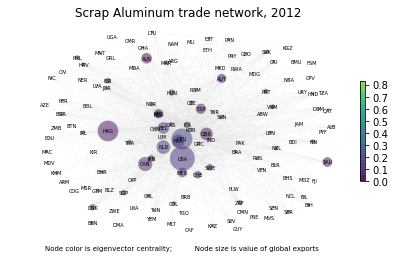

In [7]:
# Visualization
# Calculate position of each node in G using networkx spring layout
pos = nx.spring_layout(G,k=30,iterations=8) 

# Draw nodes
nodes = nx.draw_networkx_nodes(G,pos, node_size=node_size, \
                               node_color=node_color, alpha=0.5) 
# Draw edges
edges = nx.draw_networkx_edges(G, pos, edge_color='lightgray', \
                               arrows=False, width=0.05,)

# Add labels
nx.draw_networkx_labels(G,pos,font_size=5)
nodes.set_edgecolor('gray')

# Add labels and title
plt.text(0,-0.1, \
         'Node color is eigenvector centrality; \
         Node size is value of global exports', \
         fontsize=7)
plt.title('Scrap Aluminum trade network, 2012', fontsize=12)

# Bar with color scale for eigenvalues
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None, fraction=0.015, pad=0.04)
cbar.set_clim(0, 1)

# Plot options
plt.margins(0,0)
plt.axis('off') # Save as high quality png
plt.savefig('test.png', dpi=1000)